# Please Play with SideBard Chatbot!

1. Ask any question that is in the google's help documents for google sheets, google docs, or Bard and get the answer! 

2. SideBard will say "I don't know" if it doesn't know the answer from the documents we have compiled, but may give a reasonable guess based on what it searched. 

3. Why did SideBard answer the way it did? Add `print_message=True` to the `ask` function to see the text it searched.

4. Curious for more? Look at the top 10 results from the search by adding `print_search=True` to the `ask` function.

### Dependencies

- To run this code click `run all` in your jupyter notebook. 
- You will need your own OpenAI API Key
- Finally you will have to have Python 3.9 installed with the following libraries:

OpenAI version:  0.27.8

Pandas version:  2.0.2

Seaborn version:  0.12.2

Numpy version:  1.23.4

Matplotlib version:  3.6.2

Scipy version:  1.10.1

Other Libraries: requests, ast, tiktoken, os, IPython.display, re

In [1]:
import requests

script_url = "https://raw.githubusercontent.com/scelarek/Google-Industry-Day/c846915dcecec84a210f5fd510e75a42bff24e32/SideBard%20Chatbot/function_source.py"
response = requests.get(script_url)
script_content = response.text

# Execute the fetched script
exec(script_content)


In [2]:
# from function_source import *
from api_doc import *

# OPEN_AI_KEY = your_key_here

# Choose your GPT model default is turbo
# GPT_MODEL = "gpt-3.5-turbo"

# API configuration
openai.api_key = OPEN_AI_KEY

# for LangChain
os.environ["OPENAI_API_KEY"] = OPEN_AI_KEY


In [3]:
your_question = input("What is your question? ")

display_answer_in_markdown(your_question, 'User Question')



### Category: User Question  
### Question:  
How do I make a custom function in Sheets?
    ---
### Answer:  
Hello Samir! To make a custom function in Google Sheets, you can use Google Apps Script. Here are the steps:

1. Open your Google Sheets document.
2. Click on "Extensions" in the menu bar.
3. Select "Apps Script" from the dropdown menu.
4. This will open the Apps Script editor in a new tab.
5. In the editor, delete any existing code and write your custom function using JavaScript.
6. Save the script by clicking on the floppy disk icon or by pressing Ctrl + S (Windows) or Command + S (Mac).
7. Close the Apps Script editor tab.
8. Now you can use your custom function in your Google Sheets document by typing its name in a cell, just like any other built-in function.

Please note that creating custom functions requires some programming knowledge in JavaScript. If you're not familiar with coding, you may need to seek assistance or refer to additional resources for guidance. 
    ---
    

In [4]:
# Set up the data
answers = pd.DataFrame(strings_ranked_by_relatedness(your_question, df, top_n=15))
answers = answers.T.rename(columns={0: 'Answer', 1: 'Relatedness'}).sort_values("Relatedness", ascending=False).reset_index(drop=True)
answers.head()



,Answer,Relatedness
0,"Title: Google Sheets, Description: Skip to mai...",0.834914
1,"Title: Google Sheets, Description: Skip to mai...",0.8334
2,"Title: Google Sheets, Description: Skip to mai...",0.828353
3,"Title: Google Sheets, Description: Skip to mai...",0.826008
4,"Title: Google Sheets, Description: Skip to mai...",0.819495


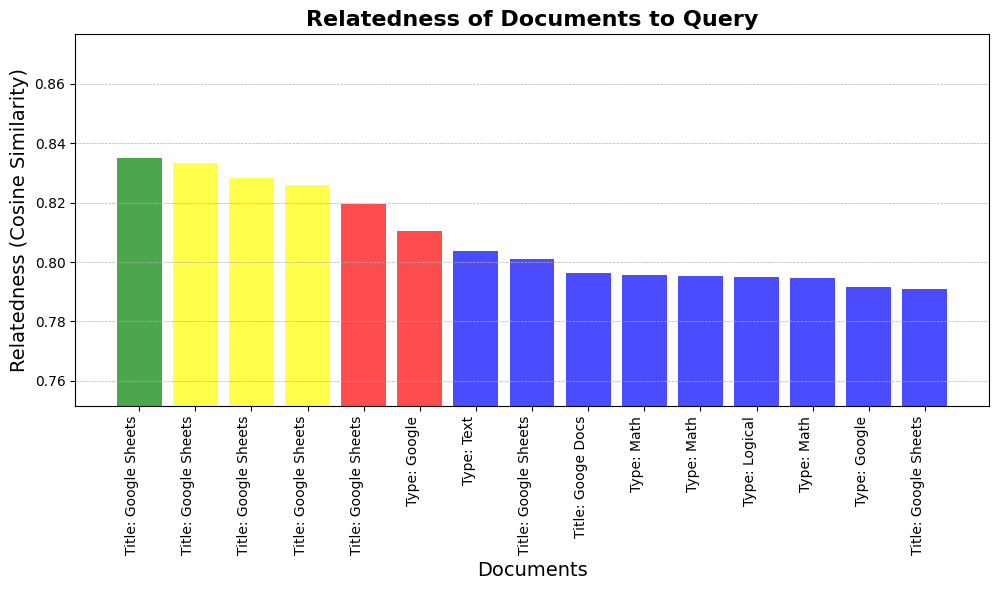

In [5]:
plot_relatedness(answers, ['blue', 'red', 'yellow', 'green'])


In [6]:
ask(your_question, print_message=True)

I'm 40 to 49 years old. I have basic knowledge about AI. Use the below articles on Google's help and user experience documentation to answer the subsequent question. If the answer cannot be found in the articles, answer to the best of your abilities but convey that you were unable to find the information with the Google Help dataset you were provided. Please say hello to Samir before offering your answer"
\Google Help article section:
"""
Title: Google Sheets, Description: Skip to main content
Help Center
Announcements
Google Workspace
Get startedLearn by productLearn by role & industryHybrid workplace tipsProductivity tipsBusiness tutorialsSwitch from Microsoft & othersSupport & accessibility
Working with remote and in-office colleagues? Learn how to thrive in hybrid work environments.


Get started with Sheets for Google Workspace
Create your first spreadsheet
Next: Share & collaborate on a spreadsheet
Want to use Google apps at work or school?  Sign up for a Google Workspace trial
"

'Hello Samir! To make a custom function in Google Sheets, you can use Google Apps Script. Here are the steps:\n\n1. Open your Google Sheets document.\n2. Click on "Extensions" in the menu bar.\n3. Select "Apps Script" from the dropdown menu.\n4. This will open the Apps Script editor in a new tab.\n5. In the editor, delete any existing code and write your custom function using JavaScript.\n6. Save the script by clicking on the floppy disk icon or by pressing Ctrl + S (Windows) or Command + S (Mac).\n7. Close the Apps Script editor tab.\n8. Now you can use your custom function in your Google Sheets document by typing its name in a cell, just like any other built-in function.\n\nPlease note that creating custom functions requires some programming knowledge in JavaScript. If you\'re not familiar with coding, you may need to seek assistance or refer to additional resources for guidance.'